In [1]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from society.agent import Agent, TrainableAgent
from society.simulations import OnlineLearningSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.selection.greedy import (
    EGreedySelectionStrategy,
    GreedySelectionStrategy,
)
from society.strategies.selection.qlearning import QLearningSelectionStrategy
from society.strategies.selection.random import RandomSelectionStrategy
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (10, 6)

c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\numeric.py:1211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


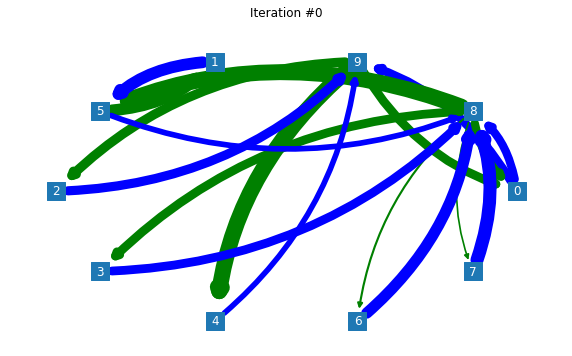

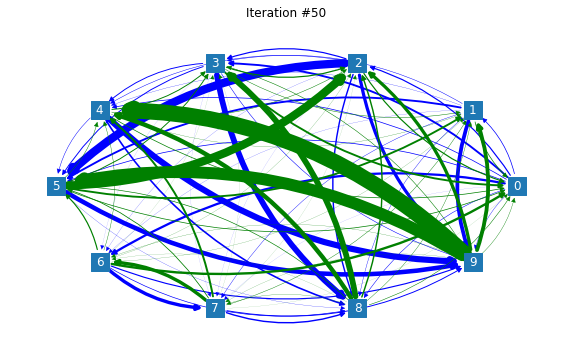

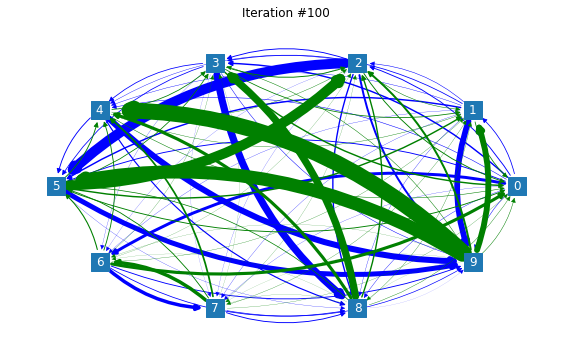

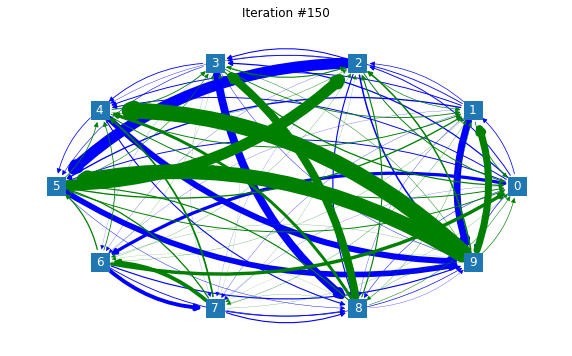

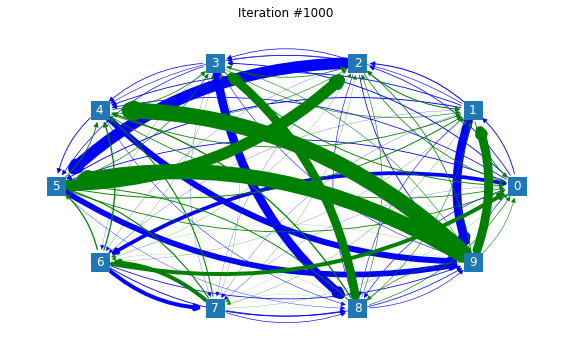

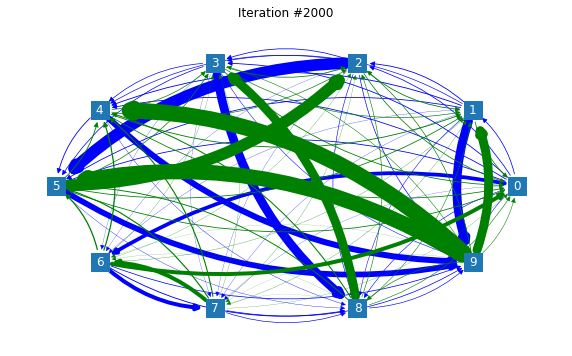

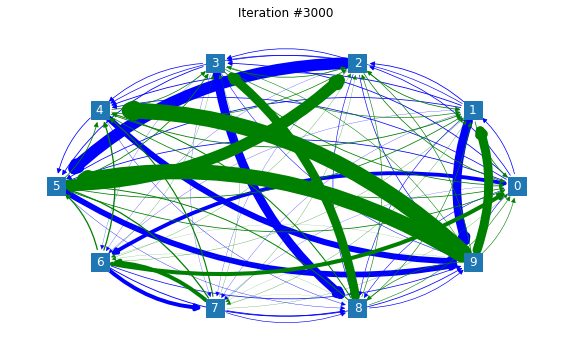

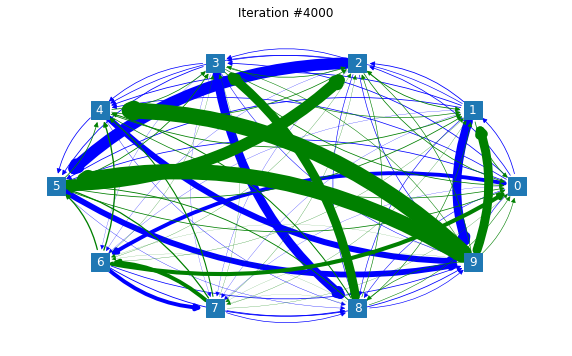

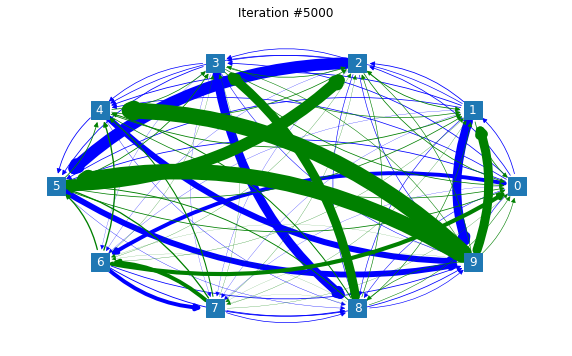

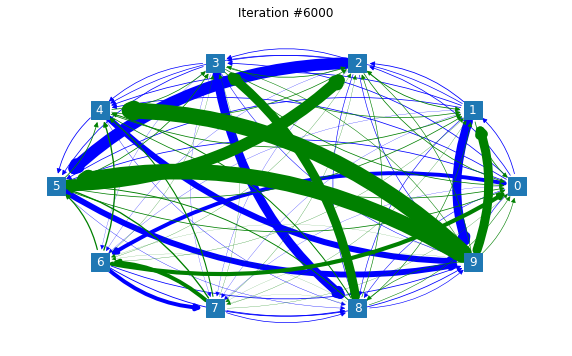

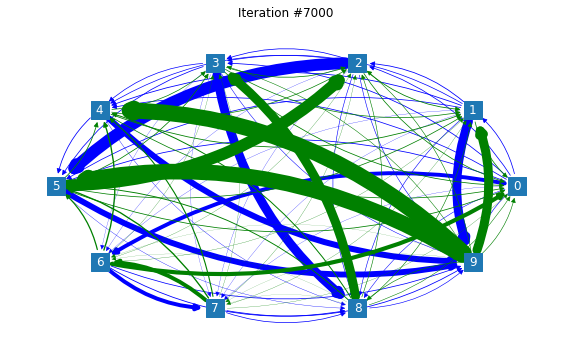

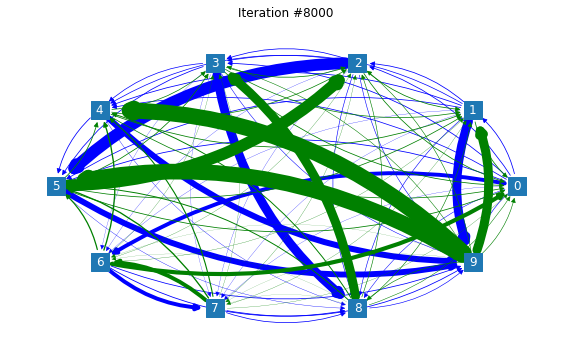

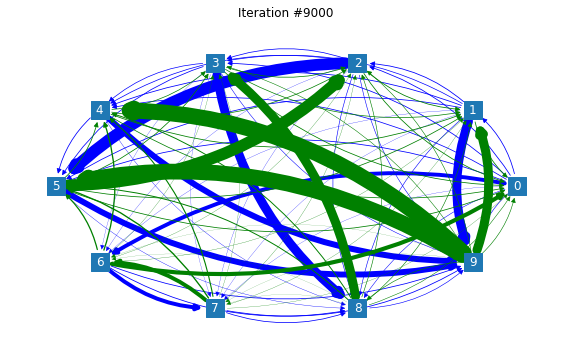

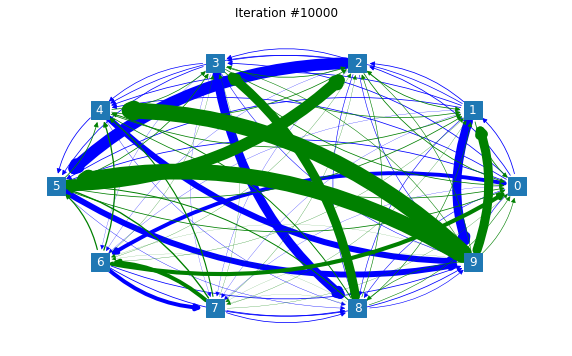

In [2]:
POPULATION = 10
ts = datetime.datetime.now().strftime("%Y-%m-%d %H-%M-%S")
os.makedirs(f"images/{ts}")

agents = [
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 0
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 1
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 2
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 3
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                      # 4
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                      # 5
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                      # 6
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                      # 7
    TrainableAgent(QLearningSelectionStrategy(POPULATION), RandomGameplayStrategy(), 0, POPULATION),    # 8
    TrainableAgent(QLearningSelectionStrategy(POPULATION), RandomGameplayStrategy(), 0, POPULATION),    # 9
]

for agent in agents:
    agent.selection_strategy._epsilon = 0.25

sim = OnlineLearningSimulation(agents)
sim.reset()

for i in range(10001):
    sim.play_round()

    if (i < 200 and i % 50 == 0) or (i >= 200 and i % 1000 == 0):
        plot_graph(make_graph(sim.returns), title=f"Iteration #{i}")
        plt.savefig(f"images/{ts}/{i}.png")


In [3]:
# Returns by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    returns_by_partner = [sum(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in returns_by_partner],
        "=>",
        sum(returns_by_partner),
    )

   0        1        2        3        4        5        6        7        8        9       
0: 0        159900   158700   155400   150900   157500   785763   46530    107439   116476   => 1838608
1: 159900   0        157500   142500   153600   152700   51183    48609    115192   1800237  => 2781421
2: 158700   157500   0        151200   144900   2369400  49995    50292    116326   112938   => 3311251
3: 155400   142500   151200   0        140700   150600   47025    45441    1796733  105526   => 2735125
4: 150900   153600   144900   140700   0        159000   0        0        72087    1208748  => 2029935
5: 157500   152700   2369400  150600   159000   0        0        0        74868    1187772  => 4251840
6: 825448   53768    52520    49400    256500   249000   0        795900   161012   154964   => 2598512
7: 48880    51064    52832    47736    229500   275000   795900   0        152176   156604   => 1809692
8: 108569   116422   117676   1816943  191942   198588   26622    25456    

[9, 5, 2, 1, 3, 8, 6, 4, 0, 7]


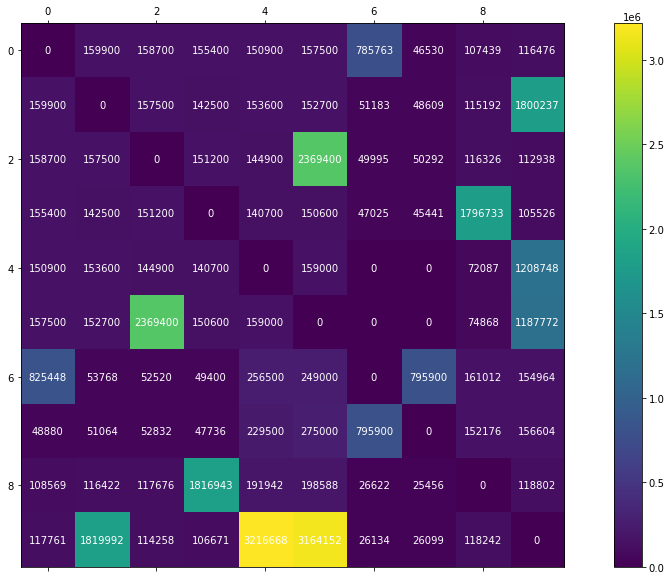

In [4]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.returns]
ranked_partners = sorted(range(POPULATION), key=lambda i: sum(returns_matrix[i]), reverse=True)
print(ranked_partners)

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
m = ax.matshow(returns_matrix)
fig.colorbar(m)

for (i, j), z in np.ndenumerate(returns_matrix):
    ax.text(
        j,
        i,
        "{:0.0f}".format(z),
        ha="center",
        va="center",
        color="white"
    ) # bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')


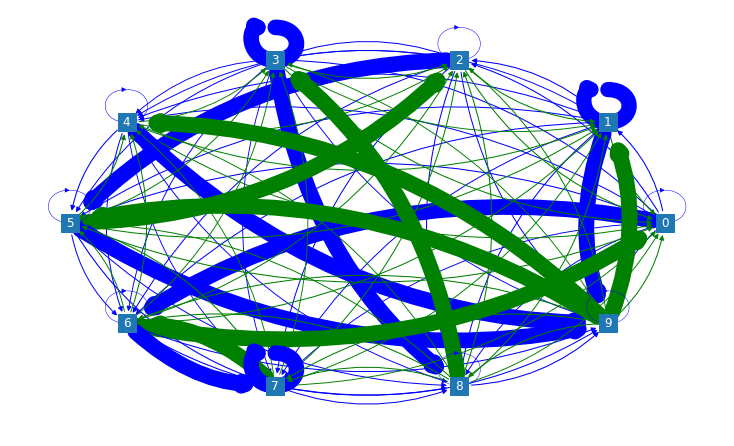

In [5]:
plot_graph(make_frequencies_graph(sim.returns))

In [6]:
# Frequencies by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    frequencies_by_partner = [len(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in frequencies_by_partner],
        "=>",
        sum(frequencies_by_partner),
    )

   0        1        2        3        4        5        6        7        8        9       
0: 246      533      529      518      503      525      7937     470      479      517      => 12257
1: 533      7698     525      475      512      509      517      491      516      8025     => 19801
2: 529      525      248      504      483      7898     505      508      519      504      => 12223
3: 518      475      504      7844     469      502      475      459      8013     469      => 19728
4: 503      512      483      469      264      530      513      459      480      8045     => 12258
5: 525      509      7898     502      530      258      498      550      497      7912     => 19679
6: 7937     517      505      475      513      498      248      7959     535      519      => 19706
7: 470      491      508      459      459      550      7959     7796     508      522      => 19722
8: 479      516      519      8013     480      497      535      508      236      526    